In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:48<00:00, 24.1MB/s]
100% 1.06G/1.06G [00:48<00:00, 23.5MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
directory = '/content/test',
labels='inferred',
label_mode = 'int',
batch_size=32,
image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image, label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model = Sequential()



model.add(Conv2D (32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding='valid'))

model.add(Conv2D (64, kernel_size=(3,3), padding='valid', activation= 'relu'))
model.add(MaxPooling2D (pool_size=(2,2), strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense (128, activation='relu'))
model.add(Dense (64, activation= 'relu'))
model.add(Dense (1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 79ms/step - accuracy: 0.6167 - loss: 0.6439 - val_accuracy: 0.7672 - val_loss: 0.5027
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.7624 - loss: 0.4905 - val_accuracy: 0.7870 - val_loss: 0.4568
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.8259 - loss: 0.3842 - val_accuracy: 0.7764 - val_loss: 0.4846
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 71ms/step - accuracy: 0.8875 - loss: 0.2609 - val_accuracy: 0.8006 - val_loss: 0.6332
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 74ms/step - accuracy: 0.9420 - loss: 0.1462 - val_accuracy: 0.7738 - val_loss: 1.0881
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 72ms/step - accuracy: 0.9662 - loss: 0.0949 - val_accuracy: 0.7596 - val_loss: 1.1925
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 77ms/step - accuracy: 0.9746 - loss: 0.0763 - val_accuracy: 0.7786 - val_loss: 0.9834
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 78ms/step - accuracy: 0.9831 - loss: 0.0502 - 

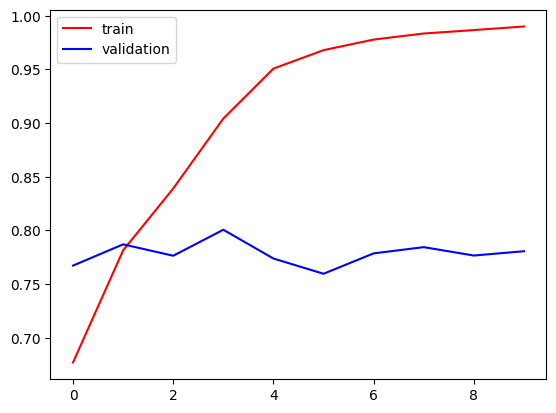

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

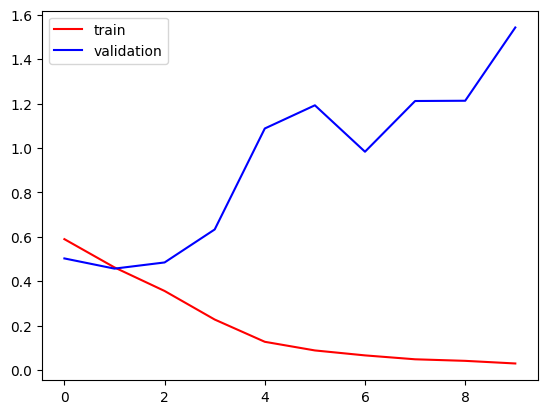

In [ ]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/dog2.jpg')

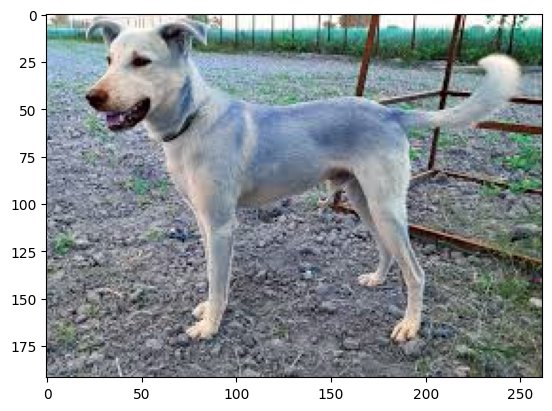

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(192, 262, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 863ms/step


array([[1.]], dtype=float32)

In [1]:
import hashlib
import os
import json

def generate_file_hash(file_path, algorithm='sha256'):
    hash_func = hashlib.new(algorithm)
    with open(file_path, 'rb') as f:
        while chunk := f.read(8192):  # Read file in chunks
            hash_func.update(chunk)
    return hash_func.hexdigest()

def generate_hashes_for_dataset(dataset_path, save_path, algorithm='sha256'):
    hashes = {}
    for root, _, files in os.walk(dataset_path):
        for file in files:
            file_path = os.path.join(root, file)
            file_hash = generate_file_hash(file_path, algorithm)
            # Store hash relative to dataset_path for portability
            relative_path = os.path.relpath(file_path, dataset_path)
            hashes[relative_path] = file_hash

    # Save hashes to a file (JSON format)
    with open(save_path, 'w') as f:
        json.dump(hashes, f, indent=4)
    print(f"Hashes saved to {save_path}")

In [5]:
dataset_path = "/content/dogs_vs_cats/test"
hash_file = "hashes.json"
generate_hashes_for_dataset(dataset_path, hash_file)

Hashes saved to hashes.json


In [28]:
def verify_dataset_with_hashes(dataset_path, hash_file, algorithm='sha256'):
    # Load saved hashes
    with open(hash_file, 'r') as f:
        saved_hashes = json.load(f)

    for relative_path, saved_hash in saved_hashes.items():
        file_path = os.path.join(dataset_path, relative_path)
        if not os.path.exists(file_path):
            print(f"Missing file: {relative_path}")
            return False

        current_hash = generate_file_hash(file_path, algorithm)
        if current_hash != saved_hash:
            print(f"Tampered or altered file: {relative_path}")
            return False

    print("Dataset is authentic and intact.")
    return True
    dataset_path = "/content/dogs_vs_cats/test"
hash_file = "hashes.json"
verify_dataset_with_hashes(dataset_path, hash_file)

Tampered or altered file: cats/cat.10017.jpg


False

In [15]:
!apt-get update
!apt-get install -y clamav clamav-daemon

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,196 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,458 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,543 kB]
Get:13 http://archive.ubuntu.com/ubunt

In [16]:
!freshclam

Thu Dec 12 06:48:57 2024 -> ClamAV update process started at Thu Dec 12 06:48:57 2024
Thu Dec 12 06:48:57 2024 -> daily database available for download (remote version: 27484)
Time:    0.7s, ETA:    0.0s [========================>]   61.38MiB/61.38MiB
Thu Dec 12 06:48:59 2024 -> Testing database: '/var/lib/clamav/tmp.41dd9b3a12/clamav-4aa99068e9d0243f445fc7587f1f6af7.tmp-daily.cvd' ...
Thu Dec 12 06:49:08 2024 -> Database test passed.
Thu Dec 12 06:49:08 2024 -> daily.cvd updated (version: 27484, sigs: 2069620, f-level: 90, builder: raynman)
Thu Dec 12 06:49:08 2024 -> main database available for download (remote version: 62)
Time:    0.8s, ETA:    0.0s [========================>]  162.58MiB/162.58MiB
Thu Dec 12 06:49:12 2024 -> Testing database: '/var/lib/clamav/tmp.41dd9b3a12/clamav-e49096a44fc5cac95b0ee92caa168225.tmp-main.cvd' ...
Thu Dec 12 06:49:21 2024 -> Database test passed.
Thu Dec 12 06:49:21 2024 -> main.cvd updated (version: 62, sigs: 6647427, f-level: 90, builder: sigmgr)

In [18]:
!clamscan -r /content/dogs_vs_cats/test

Streaming output truncated to the last 5000 lines.
/content/dogs_vs_cats/test/dogs/dog.311.jpg: OK
/content/dogs_vs_cats/test/dogs/dog.12146.jpg: OK
/content/dogs_vs_cats/test/dogs/dog.10006.jpg: OK
/content/dogs_vs_cats/test/dogs/dog.2506.jpg: OK
/content/dogs_vs_cats/test/dogs/dog.8537.jpg: OK
/content/dogs_vs_cats/test/dogs/dog.4831.jpg: OK
/content/dogs_vs_cats/test/dogs/dog.11919.jpg: OK
/content/dogs_vs_cats/test/dogs/dog.9131.jpg: OK
/content/dogs_vs_cats/test/dogs/dog.10126.jpg: OK
/content/dogs_vs_cats/test/dogs/dog.6423.jpg: OK
/content/dogs_vs_cats/test/dogs/dog.10620.jpg: OK
/content/dogs_vs_cats/test/dogs/dog.4811.jpg: OK
/content/dogs_vs_cats/test/dogs/dog.3089.jpg: OK
/content/dogs_vs_cats/test/dogs/dog.11270.jpg: OK
/content/dogs_vs_cats/test/dogs/dog.10883.jpg: OK
/content/dogs_vs_cats/test/dogs/dog.4599.jpg: OK
/content/dogs_vs_cats/test/dogs/dog.1500.jpg: OK
/content/dogs_vs_cats/test/dogs/dog.8059.jpg: OK
/content/dogs_vs_cats/test/dogs/dog.10754.jpg: OK
/content/do